We split the system into $a$ and $b$:
$|\psi> = \sum_{a,b}\psi_{a,b}|a> \otimes |b>$.

We perform a SVD on the coefficient:
$\psi_{a,b} = \sum_{i}U_{a,i}s_{i}V^{\dagger}_{i,b}$.

We can now write
$|\psi> = \sum_{i} s_{i} (\sum_{a} U_{a,i} |a>  )\otimes( \sum_{b} V^{\dagger}_{i,b} |b>) = \sum_{i} s_{i} |\phi_i>$, 
where the $|\phi_i>$ are orthogonal.

Tracing out $b$, we get the reduced density matrix for subsystem $a$ as: $\rho_{a} = \sum_{i}s_{i}^{2}|\phi_{a}><\phi_{a}|$.

It readily follows that $S=-\sum_i s_i^2\ln(s_i^2)$


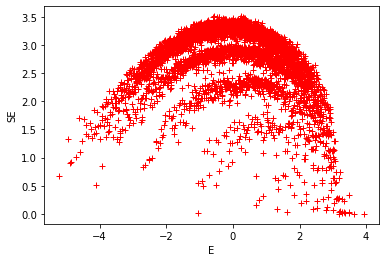

In [1]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
import scipy
from scipy.sparse import csr_matrix
from sympy import re

def get_H(L):
    basis=[]
    for s in itertools.product([-1,1],repeat=L):
        basis.append(s)
        
    dim=len(basis)
    H = np.zeros((dim,dim))
    # Create H
    for i,s in enumerate(basis):
        matel=0.0
        ## diagonal terms
        for site in range(L):
            matel+=s[site]*s[(site+1)%L]/4
        H[i,i]= matel
        # W = -0.5, 0.5
        h = (np.random.random_sample((L)) - 0.5)
        H[i,i] += np.dot(h,s)*0.5 

        ## offdiag
        for site in range(L-1):
            
            if s[site]!=s[(site+1)%L]:
                state2=list(s)
                state2[site], state2[(site+1)%L] =  state2[(site+1)%L], state2[site]
                idx2 = basis.index(tuple(state2))
                H[i,idx2]=0.5
                H[idx2,i]=0.5
    return H

def entropy(eig):
    eig = eig[eig > 1.e-30]
    return -np.sum(eig**2 * np.log(eig**2))

l = 12
H = get_H(l)

eig, vecs = np.linalg.eig(H)

ES = []

for i in range(len(eig)):
    psi = vecs[:,i]
    psi_ab = np.reshape(psi, (2**int(l/2),2**int(l/2)))
    U,S,V = np.linalg.svd(psi_ab)
    ES.append(entropy(S))

plt.plot(eig, ES,'r+')
plt.ylabel('SE')
plt.xlabel('E')
plt.show()

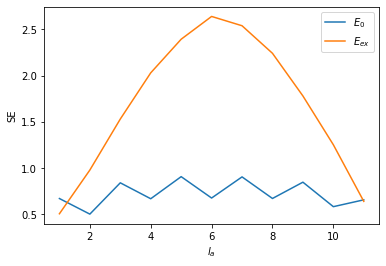

In [2]:
l_a = np.arange(1,l)
def state_ES(state,vecs, position):
    psi = vecs[:,state]
    psi_ab = np.reshape(psi, (2**int(position),2**int(l - position)))
    U,S,V = np.linalg.svd(psi_ab)
    return entropy(S)

g = np.argsort(eig)[0]

ES_G = [state_ES(g, vecs, i) for i in l_a]
ES_E = [state_ES( int((2**l)/2) , vecs, i) for i in l_a]


plt.plot(l_a, ES_G,label='$E_{0}$')
plt.plot(l_a, ES_E,label='$E_{ex}$')

plt.xlabel('$l_{a}$')
plt.ylabel('SE')
plt.legend()
plt.show()